In [2]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
# read multiple stocks csv

stockxx = pd.read_csv("Datasets/BYND.csv")
# stockxx.columns=stockxx.columns.str.replace('/','')
# stockxx.columns=stockxx.columns.str.replace('CloseLast','Close')
# stockxx[" Close"]= stockxx[' Close'].str.replace('$', '')
# stockxx[" Open"]= stockxx[' Open'].str.replace('$', '')
# stockxx[" High"]= stockxx[' High'].str.replace('$', '')
# stockxx[" Low"]= stockxx[' Low'].str.replace('$', '')
# stockxx.columns=["Date", "Close","Volume", "Open", "High", "Low", "Symbol"]
stockxx


,Unnamed: 0,Unnamed: 0.1,Date,Close,Volume,Open,High,Low,Symbol
0,0,0,2020/10/12,192.30,2506008,196.53,197.25,190.76,BYND
1,1,1,2020/10/09,194.95,3107515,194.66,195.91,190.45,BYND
2,2,2,2020/10/08,193.38,5878861,193.00,197.50,188.64,BYND
3,3,3,2020/10/07,189.14,5167850,184.65,191.60,184.20,BYND
4,4,4,2020/10/06,181.86,8478843,176.23,186.70,175.00,BYND
...,...,...,...,...,...,...,...,...,...
361,361,361,2019/05/08,72.25,14711810,83.61,85.38,70.79,BYND
362,362,362,2019/05/07,79.17,16532100,77.14,85.45,75.00,BYND
363,363,363,2019/05/06,74.79,8746178,62.73,74.84,62.50,BYND
364,364,364,2019/05/03,66.79,13139370,72.00,74.00,65.66,BYND


In [3]:
stockxx.dtypes
stockxx[' Close'] = pd.to_numeric(stockxx[' Close']) 

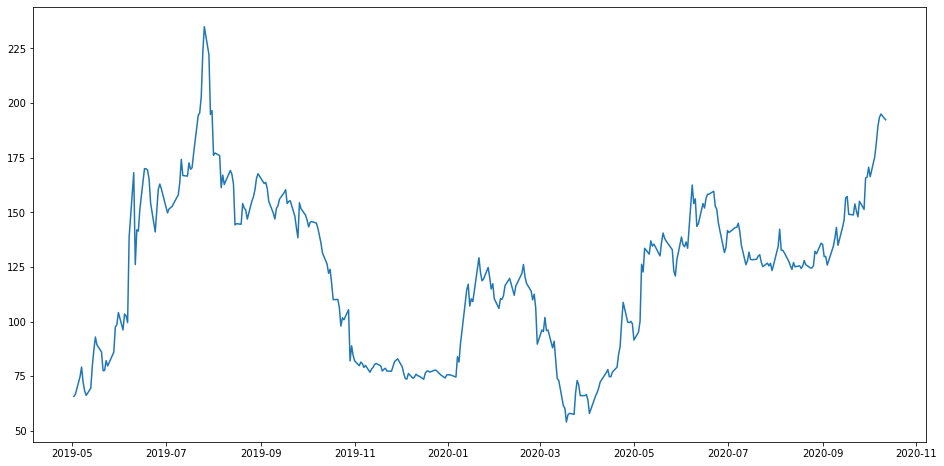

In [4]:
# Analyze Closing Prices
stockxx['Date']=pd.to_datetime(stockxx.Date, format = '%m/%d/%Y')
stockxx.index=stockxx['Date']
stockxx.sort_index(inplace = True)
# stockxx.keys()

plt.figure(figsize=(16,8))
plt.plot(stockxx[' Close'], label='Close Price History')


In [5]:
# Filter Date and Close columns

data=stockxx.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(stockxx)),columns=['Date',' Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset[" Close"][i]=data[" Close"][i]
    
new_dataset.index=new_dataset.Date

In [6]:
# Normalize the new df
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:300,:]
valid_data=final_dataset[300:,:]


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [7]:
# Training LSTM model

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))



lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

240/240 - 7s - loss: 0.0125


In [14]:
# Test a sample from the dataset to make predictions

inputs=new_dataset[len(new_dataset)-len(valid_data)-60:].values

scaledinputs=scaler.fit_transform(inputs)

X_test=[]

for i in range(60,len(inputs)):
    X_test.append(scaledinputs[i-60:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [15]:
predicted_closing_price

array([[148.16013],
       [147.38654],
       [145.9154 ],
       [144.19513],
       [142.63898],
       [141.06805],
       [139.5821 ],
       [138.25552],
       [137.20166],
       [136.43095],
       [135.68701],
       [134.88872],
       [134.20375],
       [133.5511 ],
       [133.03928],
       [132.44507],
       [131.99692],
       [132.1813 ],
       [133.25307],
       [134.2664 ],
       [135.20331],
       [135.96396],
       [136.31097],
       [136.24876],
       [135.81427],
       [135.3505 ],
       [134.76727],
       [134.17374],
       [133.53494],
       [132.9701 ],
       [132.64232],
       [132.37164],
       [132.07054],
       [131.76869],
       [131.54378],
       [131.78542],
       [132.24605],
       [133.13057],
       [134.20308],
       [135.00432],
       [135.5937 ],
       [135.75716],
       [136.16174],
       [136.91049],
       [138.1454 ],
       [139.12624],
       [140.41487],
       [142.01462],
       [144.35168],
       [147.06494],


In [19]:
train_data1=new_dataset[:300]
valid_data1=new_dataset[300:]
valid_data1['Predictions'] = predicted_closing_price
valid_data1

C:\Users\DuvanFelipe\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Predictions
Date,,
2020-07-10,135.03,148.160126
2020-07-13,125.98,147.386536
2020-07-14,127.78,145.915405
2020-07-15,131.75,144.195129
2020-07-16,128.45,142.638977
...,...,...
2020-10-06,181.86,166.972092
2020-10-07,189.14,169.872238
2020-10-08,193.38,173.344940


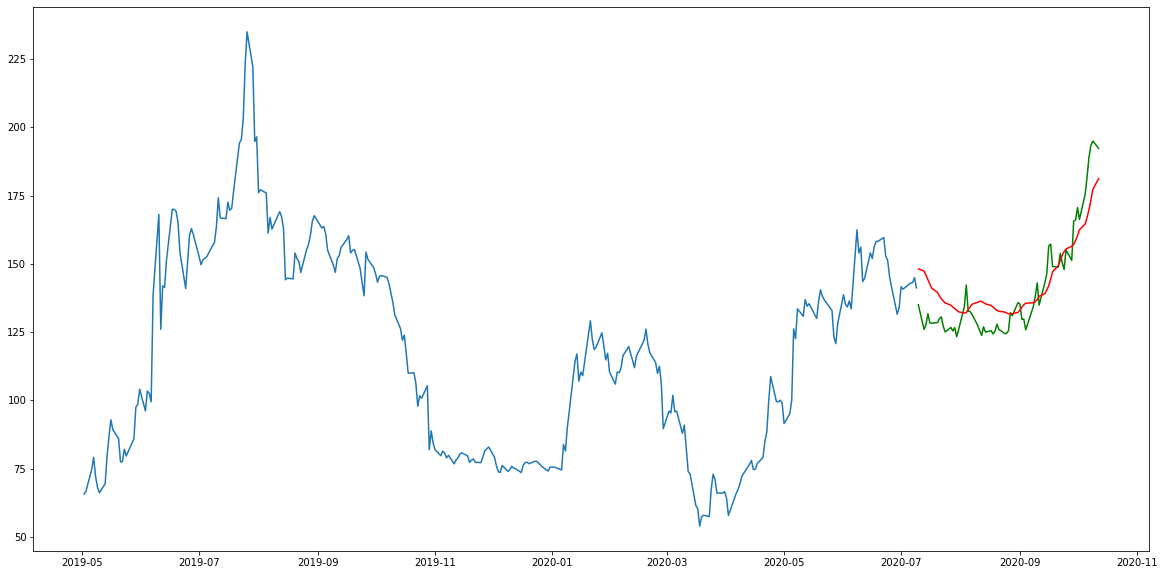

In [20]:
# visualize and compare

plt.plot(train_data1[" Close"])
plt.plot(valid_data1[" Close"],  'g')
plt.plot(valid_data1["Predictions"], 'r')

In [22]:
# Save model 

lstm_model.save("final_model.h5")